#### Import related module

In [107]:
from skimage.io import imread
from skimage.io import imsave
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

#### Import train and test data

In [267]:
train_data = pd.read_csv('train.csv')

In [268]:
final_pred_data = pd.read_csv('test.csv')

#### Interpretate the train data  

The first column indicates label of the hand draw number.  

Rest of the columns represent the image of the picture with total 784 pixels or 28x28 pixels

In [269]:
print(train_data.shape)
train_data

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Interpretate the test data

In [270]:
print(final_pred_data.shape)
final_pred_data

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Processing

Split the train data into x train and y label

In [271]:
X_pre_train = train_data.drop(labels = ['label'], axis = 1)
X_pre_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
X_pre_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Normalize pixal values to be between 0 and 1

In [273]:
X_train_normalized = X_pre_train/255.0

In [274]:
y_train = train_data['label'].values
y_train = pd.DataFrame({'label':y_train})
y_train

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


### Data Visualization
Turn the digital array into gray level image

In [275]:
X_train_normalized.loc[0].values.reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

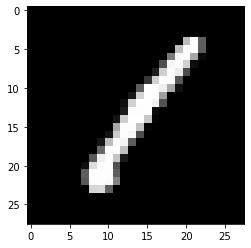

In [276]:
plt.imshow(X_train_normalized.loc[0].values.reshape(28,28), cmap = 'gray')

Check the value with y_train label

In [277]:
y_train.loc[0]

label    1
Name: 0, dtype: int64

### Data Processing - Reshape data

Reshape the X_train data and y_train data

In [278]:
X_pre_normalized_train = X_train_normalized.values.reshape(42000, 28, 28, 1)

In [279]:
#Check the shape
X_pre_normalized_train.shape

(42000, 28, 28, 1)

### Data Processing - Train Test Split

Split the existing labeled data into train test split in order to build the model and test accuracy

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X_pre_normalized_train, y_train, train_size = 0.85)

In [281]:
X_train.shape

(35700, 28, 28, 1)

### Construct Convolutional Neural Network

In [294]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
#Layer
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
#Output layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [295]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                204864    
_________________________________________________________________
dense_23 (Dense)             (None, 10)              

In [296]:
model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ['accuracy'])


In [297]:
history = model.fit(X_train, y_train, 
                    epochs = 10, 
                    validation_data = (X_test, y_test), 
                    verbose = 10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow t

197/197 - 1s - loss: 0.0564 - accuracy: 0.9870


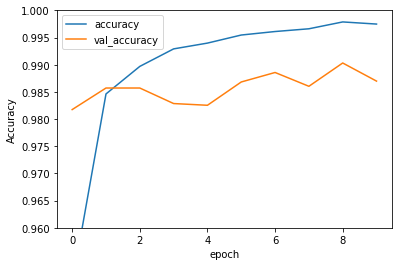

In [298]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.ylim([0.96, 1])
plt.legend()
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)

### Prediction

Double check the shape of prediction input data

In [299]:
final_pred_data.shape

(28000, 784)

Normalized the digit array to be between 0 and 1 

In [300]:
final_pred_data_normalized = final_pred_data/255.0

Reshape the input data

In [301]:
X_predict = final_pred_data_normalized.values.reshape(28000, 28, 28, 1)
X_predict.shape

(28000, 28, 28, 1)

In [302]:
y_predict_output = model.predict(X_predict)
print('shape of y_predict output data:', y_predict_output.shape)
y_predict_output

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
shape of y_predict output data: (28000, 10)


array([[-1.18725605e+01, -7.07776880e+00,  2.23659554e+01, ...,
        -5.69434285e-01, -1.29817319e+00, -2.18275700e+01],
       [ 1.56240387e+01, -1.15700550e+01, -2.80510449e+00, ...,
        -2.68569851e+00, -1.81696320e+00, -5.54898834e+00],
       [-1.02496948e+01, -3.67749238e+00, -4.87730122e+00, ...,
        -9.25151587e-01,  3.13434052e+00,  1.84859734e+01],
       ...,
       [-2.50243073e+01, -4.74018604e-03, -1.05816841e+01, ...,
        -1.12447796e+01,  5.24840295e-01, -7.67200565e+00],
       [-1.38234692e+01, -6.01200056e+00, -1.04637194e+01, ...,
        -5.14396143e+00,  1.26798368e+00,  1.63818207e+01],
       [-1.20318069e+01, -9.97506618e+00,  2.81202755e+01, ...,
        -2.94247556e+00,  1.68704844e+00, -2.31954174e+01]], dtype=float32)

Select the highest possibility in classes as the label

In [303]:
predict_answer = np.argmax(y_predict_output, axis = 1)
predict_answer

array([2, 0, 9, ..., 3, 9, 2])

import the prediction into file

In [306]:
submission = pd.read_csv('sample_submission.csv')

In [307]:
submission['Label'] = predict_answer
submission.to_csv('submission.csv', index = False)

### Reference

Tensorflow guide: https://www.tensorflow.org/tutorials/images/cnn